# Задание №4.b - Обучение нейросетевых регрессора и классификаторов

Цель работы – получить навыки создания полносвязного бинарного и многоклассового классификаторов, а также нейросетевого регрессора с помощью библиотеки построения нейронных сетей.
Задачи – Построить три нейросетевые модели:

a) Бинарный Классификатор

b) Многоклассовый классификатор

c) Регрессор


Выполнить загрузку и предварительную обработку данных из наборов. Разделить каждую выборку на обучающую, тестовую и валидационную. Произвести обучение набора нейросетевых архитектур, отличающихся разным набором параметров: число слоёв, количество нейронов в слоях, функции активации в слоях, процедур оптимизации:

-	Подобрать архитектуры нейронных сетей, которые с одной стороны позволяют получить модели с лучшими метриками качества работы, с другой стороны не являются избыточными и не переобученными.

-	Вычислить следующие метрики работы:

    1. Для бинарного классификатора: Recall, Precision, Weighted Accuracy, AUC для всех исследованных моделей.

    2. Для многоклассового классификатора: Recall, Precision, Weighted Accuracy, AUC для всех классов всех исследованных моделей. Вывести ROC-кривые для каждого класса в лучшем классификаторе.

    3. Для регрессора: MSE, MAE, R2 для всех полученных моделей.

    4. Сделать выводы по результатам построения моделей.

Описание отчета.
1. Описание наборов данных.
2. Признаки, которые были использованы для анализа.
2. Параметры архитектур и обучения нейронных сетей, использованные для обучения.
3. Графики обучения для архитектур нейронных сетей с лучшими характеристиками эффективности

## Variant - even
a)	Оценка вероятности, того, что клиент откроет банковский депозит в результате маркетинговой акции:  https://archive.ics.uci.edu/ml/datasets/Bank+Marketing Класс: атрибут 21 - y - has the client subscribed a term deposit? (binary: 'yes', 'no').

b)	Оценка здоровья внутриутробного развития плода: https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification Метка класса: fetal_health.

c)	Оценка уровня потребления ресурсов домохозяйством. Набор данных DS_2019_public.csv. Описание атрибутов – файл recs2009_public_codebook.xlsx. Предсказываемый признак – один из атрибутов (использовать только один из): TOTALBTU, TOTALBTUSPH, TOTALBTUCOL, TOTALBTUWTH, TOTALBTURFG, TOTALBTUOTH (Примечание BTU – Британская тепловая единица BTU ≈ 252 калории).


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('../data/ml-lab4/fetal_health.csv')
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [5]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [10]:
df.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [14]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [13]:
scaler = StandardScaler()
X = scaler.fit_transform(df.drop('fetal_health', axis=1))
y = to_categorical(df['fetal_health'] - 1, num_classes=3)

In [15]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [17]:
models_params = [
    {'layers': [64], 'activation': 'relu', 'optimizer': 'adam'},
    {'layers': [128, 64], 'activation': 'relu', 'optimizer': 'adam'},
    {'layers': [256, 128, 64], 'activation': 'tanh', 'optimizer': 'sgd'},
    {'layers': [128, 128], 'activation': 'relu', 'optimizer': 'adam'}
]

In [18]:
input_dim = X_train.shape[1]
trained_models = []

In [19]:
from modules.ml.b import build_model
from tensorflow.keras.callbacks import EarlyStopping

for params in models_params:
    model = build_model(input_dim, **params)
    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    history = model.fit(X_train, y_train,
                        validation_data=(X_val, y_val),
                        epochs=100,
                        batch_size=32,
                        callbacks=[early_stop],
                        verbose=0)
    trained_models.append((model, history))

/IdeaProjects/DataAnalysisMethods/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1748457266.689228    1377 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5557 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3070 Ti, pci bus id: 0000:03:00.0, compute capability: 8.6
I0000 00:00:1748457268.610813    4344 service.cc:152] XLA service 0x7f5bcc004b10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1748457268.610871    4344 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Ti, Compute Capability 8.6
2025-05-28 18:34:28.643638: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disa

In [20]:
trained_models

[(<Sequential name=sequential, built=True>,
  <keras.src.callbacks.history.History at 0x7f5d53769400>),
 (<Sequential name=sequential_1, built=True>,
  <keras.src.callbacks.history.History at 0x7f5d0ff00e30>),
 (<Sequential name=sequential_2, built=True>,
  <keras.src.callbacks.history.History at 0x7f5d0ff9c350>),
 (<Sequential name=sequential_3, built=True>,
  <keras.src.callbacks.history.History at 0x7f5cdd3d63c0>)]

In [21]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

def compute_metrics(model, X_test, y_test):
    y_pred_prob = model.predict(X_test)
    y_pred = np.argmax(y_pred_prob, axis=1)
    y_true = np.argmax(y_test, axis=1)

    # Precision, Recall (macro)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')

    # Weighted Accuracy
    class_counts = np.bincount(y_true)
    weights = class_counts / len(y_true)
    weighted_acc = sum(weights[i] * (y_pred[y_true == i] == y_true[y_true == i]).mean()
                       for i in range(3))

    # AUC (One-vs-Rest)
    from sklearn.metrics import roc_auc_score
    auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')

    return precision, recall, weighted_acc, auc

In [22]:
results = []
for i, (model, _) in enumerate(trained_models):
    precision, recall, weighted_acc, auc = compute_metrics(model, X_test, y_test)
    results.append({
        'Model': f'Model {i+1}',
        'Precision': precision,
        'Recall': recall,
        'Weighted Accuracy': weighted_acc,
        'AUC': auc
    })

results_df = pd.DataFrame(results)
print(results_df.sort_values(by='AUC', ascending=False))

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step
     Model  Precision    Recall  Weighted Accuracy       AUC
0  Model 1   0.897107  0.850417           0.924765  0.981179
3  Model 4   0.911376  0.860681           0.934169  0.981049
2  Model 3   0.874845  0.811918           0.915361  0.976212
1  Model 2   0.891928  0.827070           0.921630  0.976030


In [27]:
best_idx = results_df['AUC'].idxmax()
best_idx

0

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


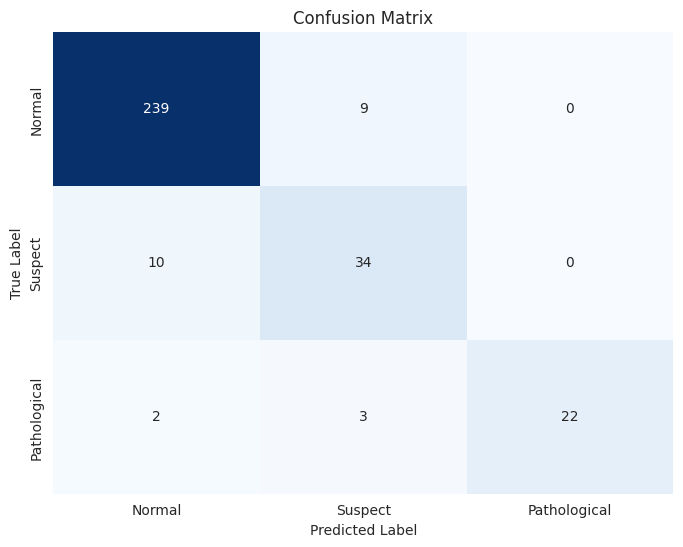

In [28]:
from sklearn.metrics import confusion_matrix

best_model = trained_models[best_idx][0]
y_pred = np.argmax(best_model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Normal', 'Suspect', 'Pathological'],
            yticklabels=['Normal', 'Suspect', 'Pathological'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [29]:
def plot_training_history(model_histories, model_names):
    plt.figure(figsize=(14, 6))

    # График потерь (loss)
    plt.subplot(1, 2, 1)
    for i, (history, name) in enumerate(zip(model_histories, model_names)):
        epochs = range(1, len(history.history['loss']) + 1)
        plt.plot(epochs, history.history['loss'], label=f'Train {name}', linestyle='--', linewidth=2)
        plt.plot(epochs, history.history['val_loss'], label=f'Val {name}', linewidth=2)
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # График точности (accuracy)
    plt.subplot(1, 2, 2)
    for i, (history, name) in enumerate(zip(model_histories, model_names)):
        epochs = range(1, len(history.history['accuracy']) + 1)
        plt.plot(epochs, history.history['accuracy'], label=f'Train {name}', linestyle='--', linewidth=2)
        plt.plot(epochs, history.history['val_accuracy'], label=f'Val {name}', linewidth=2)
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

In [30]:
top_models = results_df.sort_values(by='AUC', ascending=False).head(2)
top_indices = top_models.index.tolist()
top_indices

[0, 3]

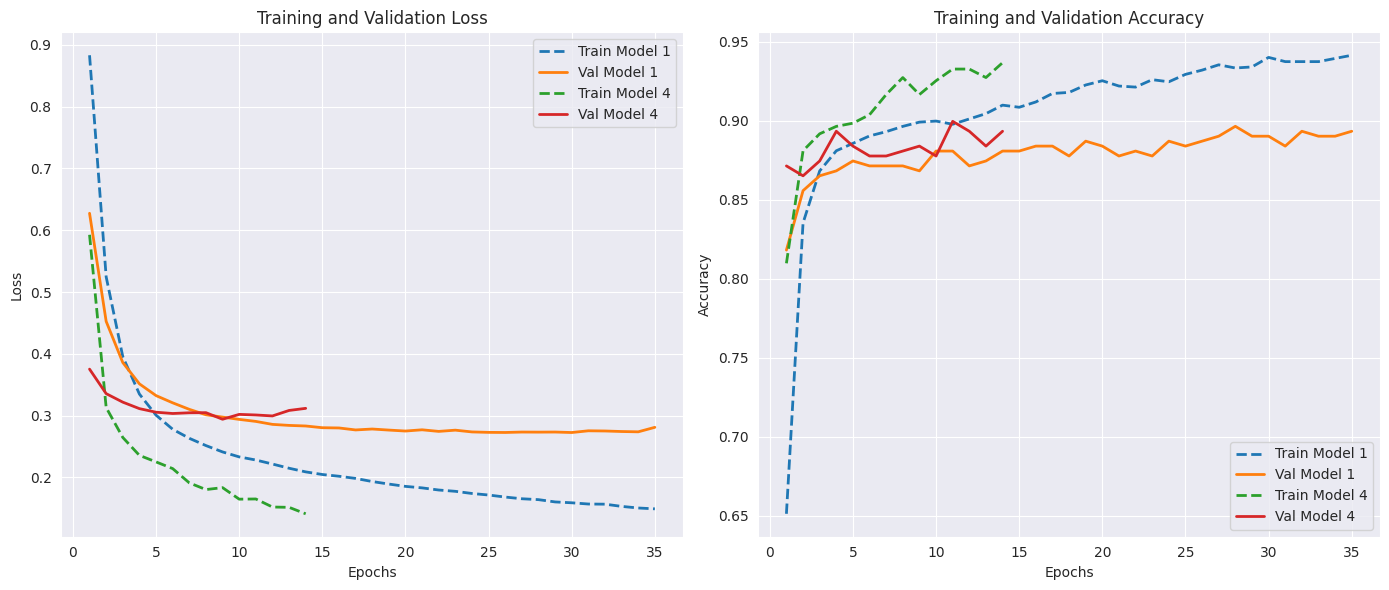

In [31]:
top_histories = [trained_models[i][1] for i in top_indices]
top_names = [f"Model {i+1}" for i in top_indices]

plot_training_history(top_histories, top_names)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


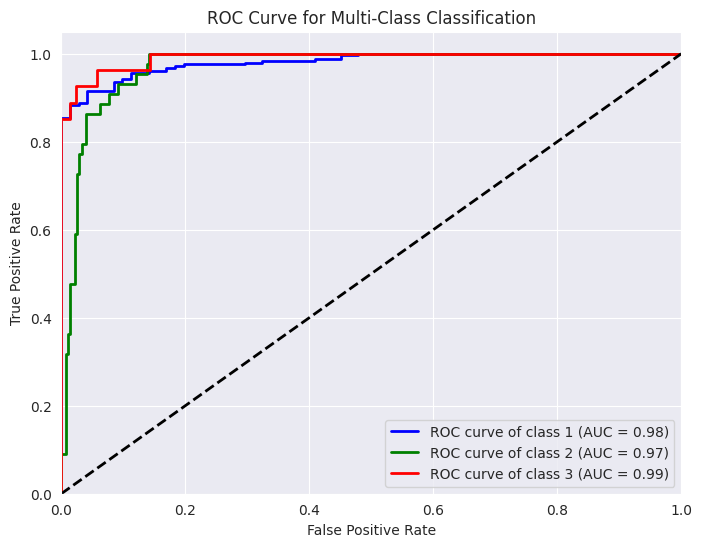

In [24]:
from sklearn.metrics import roc_curve, auc

y_pred_prob = best_model.predict(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Построение
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red']
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (AUC = {1:0.2f})'
             ''.format(i+1, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc="lower right")
plt.show()

In [32]:
models_params[best_idx]

{'layers': [64], 'activation': 'relu', 'optimizer': 'adam'}

Mодель с такими параметрами имеет лучший результат